In [1]:
import os
print(os.getcwd())

/home/arora/Crossword-Solver


In [2]:
import requests

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/mtflasktut/images/meow.png"

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files= files)
    
# Check the response
print(res.status_code)

200


In [21]:
import requests

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/mtflasktut/images/meow.png"

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files= files)
    
# Check the response
# print(res.text) # assuming the response in in JSON format

In [18]:
import requests
import matplotlib.pyplot as plt
import cv2

# Set the URL of the server
url = "http://127.0.0.1:5000"  # Make sure this matches your Flask app's URL

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/Testing/crosswordE.jpg"

# Load the original image using OpenCV (to display it)
original_image = cv2.imread(image_path)
# Convert the image from BGR to RGB (OpenCV uses BGR by default)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Open the image file in binary mode and send the POST request
with open(image_path, "rb") as image_file:
    files = {"image": image_file}
    res = requests.post(url, files=files)

# Check the response
print(res.status_code)
# print(res.text)  # Assuming the response is in JSON format

# # Display the original image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(original_image)
# plt.axis('off')  # Hide axes

# # Assuming you have a way to get the transformed image
# # For now, we'll just show the original image again in the transformed section
# plt.subplot(1, 2, 2)
# plt.title("Transformed Image")
# plt.imshow(original_image)  # Change this to the transformed image when available
# plt.axis('off')  # Hide axes

# plt.show()

200


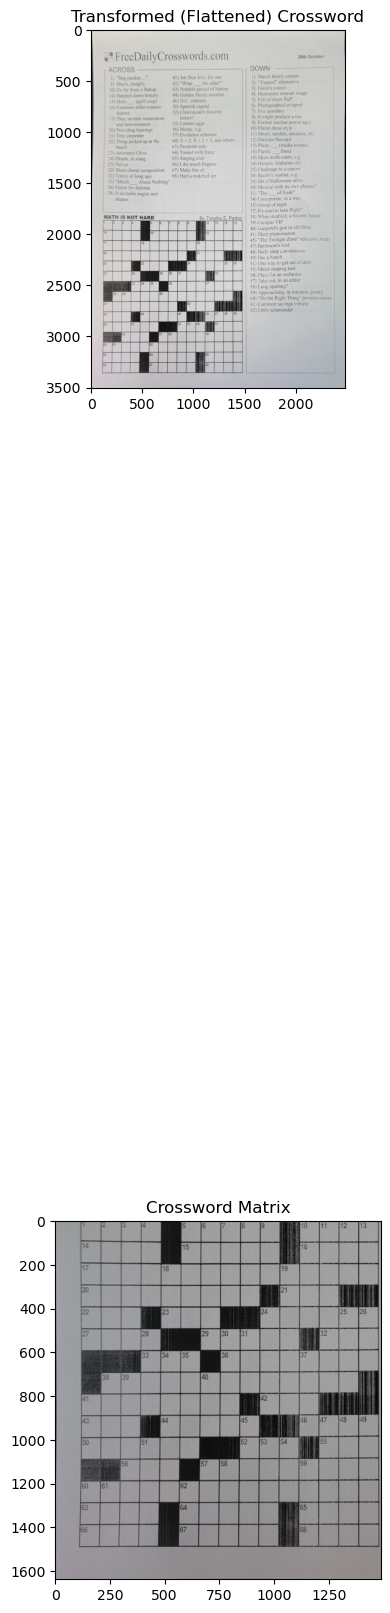

200


In [132]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import io

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/Testing/crosswordE.jpg"  # Change as needed

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files=files)

# Check the response
if res.status_code == 200:
    response_data = res.json()
    original_image_hex = response_data['original_image']
    transformed_image_hex = response_data['transformed_image']
    box1_across_hex = response_data['box1_across']
    box2_down_hex = response_data['box2_down']
    box3_matrix_hex = response_data['box3_matrix']

    # Convert hex to bytes
    original_image_bytes = bytes.fromhex(original_image_hex)
    transformed_image_bytes = bytes.fromhex(transformed_image_hex)
    box1_across_bytes = bytes.fromhex(box1_across_hex)
    box2_down_bytes = bytes.fromhex(box2_down_hex)
    box3_matrix_bytes = bytes.fromhex(box3_matrix_hex)

    # Create a larger figure
    plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

    # # Display original image
    # original_image = plt.imread(io.BytesIO(original_image_bytes), format='png')
    # plt.subplot(511), plt.imshow(original_image)
    # plt.title('Detected Corners')
    
    # Display transformed image
    transformed_image = plt.imread(io.BytesIO(transformed_image_bytes), format='png')
    plt.subplot(512), plt.imshow(transformed_image)
    plt.title('Transformed (Flattened) Crossword')
    
    # # Display transformed image
    # box1_across_image = plt.imread(io.BytesIO(box1_across_bytes), format='png')
    # plt.subplot(513), plt.imshow(box1_across_image)
    # plt.title('Across Clues')    
    
    # # Display transformed image
    # box2_down_image = plt.imread(io.BytesIO(box2_down_bytes), format='png')
    # plt.subplot(514), plt.imshow(box2_down_image)
    # plt.title('Down Clues')    

    # Display transformed image
    box3_matrix_image = plt.imread(io.BytesIO(box3_matrix_bytes), format='png')
    plt.subplot(515), plt.imshow(box3_matrix_image)
    plt.title('Crossword Matrix')
    
    
    plt.tight_layout()  # Adjust spacing between subplots    
    plt.show()
    print(res.status_code)
else:
    if res.status_code != 200:
        print(f"Error: {res.status_code} - {res.text}")

In [ ]:

import requests
import urllib

# Note: "%3F" is a reserved URI character representing "?"

# Define the base url where we will be posting a request
url = "https://www.dictionary.com/e/crosswordsolver/"

# Website result request modification per clue based on result length expectation from matrix
# Currently an example
url = url+ "Beg-pardon-.../"

parameters = {
    "p" : "????",
    "l" : 4
}

res=requests.get(url+f"?{urllib.parse.urlencode(parameters)}")
# print(res,res.text)

pos= res.text.find('class="solver-table"')

# We will need to extract the results from this for answers
print(res.text[pos:])

class="solver-table">
              <div class="solver-table__row">
                <div class="solver-table__cell">Matching Answer</div>

                <div class="solver-table__cell">Confidence</div>
              </div>

                              <div class="solver-table__row">
                    <div class="solver-table__cell" data-cy="result">AHEM</div>

                    <div class="solver-table__cell">95%</div>
                </div>
                              <div class="solver-table__row">
                    <div class="solver-table__cell" data-cy="result">WHAT</div>

                    <div class="solver-table__cell">80%</div>
                </div>
                              <div class="solver-table__row">
                    <div class="solver-table__cell" data-cy="result">ISAY</div>

                    <div class="solver-table__cell">60%</div>
                </div>
                              <div class="solver-table__row">
                    <div cla